In [1]:
import numpy as np 
import pandas as pd

In [2]:
base_path = "data/"

In [3]:
nedbit_path = "nedbit_features_bc.csv"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg15694422_MGLL,1,460,1,0.844475,415.86290,1.078528,0.198717
1,cg02116768_FOXK2,1,761,1,0.883759,426.04770,0.803134,0.079001
2,cg13675051_RNF19A,1,690,1,0.884858,408.35680,0.792330,0.094667
3,cg22644321_TRIB1,1,1290,1,0.898153,419.29990,0.727866,0.044253
4,cg18881723_SLAMF1,1,1054,1,0.897157,415.47340,0.723161,0.044574
...,...,...,...,...,...,...,...,...
10192,cg23018707_C12orf35,0,6,3,2.998150,85.12343,0.000006,0.000146
10193,cg23930101_DENND6A,0,6,3,2.998234,91.64322,0.000005,0.000263
10194,cg12047283_SGK1,0,5,3,2.996472,84.35021,0.000009,0.000114
10195,cg04225510_CDC123,0,10,3,2.998520,92.73646,0.000007,0.000335


In [4]:
#df_test_probe_genes = pd.read_csv(base_path + "test_probe_genes.csv", sep="\t")
#probe_gene_list = df_test_probe_genes.iloc[:, 0].tolist()
#df_test_probe_genes, len(probe_gene_list), probe_gene_list[:5]

In [5]:
#df_nebit_features_test = df_nebit_features[df_nebit_features["name"].isin(probe_gene_list)]
#df_nebit_features_test.reset_index(drop=True, inplace=True)
#df_nebit_features_test

In [6]:
nebit_features = df_nebit_features.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.844475,415.86290,1.078528,0.198717
1,1,0.883759,426.04770,0.803134,0.079001
2,1,0.884858,408.35680,0.792330,0.094667
3,1,0.898153,419.29990,0.727866,0.044253
4,1,0.897157,415.47340,0.723161,0.044574
...,...,...,...,...,...
10192,3,2.998150,85.12343,0.000006,0.000146
10193,3,2.998234,91.64322,0.000005,0.000263
10194,3,2.996472,84.35021,0.000009,0.000114
10195,3,2.998520,92.73646,0.000007,0.000335


In [7]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

10197 (10197, 1)


array([[ 1.67339614],
       [ 1.72671609],
       [ 1.63409985],
       ...,
       [-0.0621549 ],
       [-0.01825081],
       [-0.01825081]])

In [8]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.844475,1.673396,1.078528,0.198717
1,1,0.883759,1.726716,0.803134,0.079001
2,1,0.884858,1.634100,0.792330,0.094667
3,1,0.898153,1.691390,0.727866,0.044253
4,1,0.897157,1.671357,0.723161,0.044574
...,...,...,...,...,...
10192,3,2.998150,-0.058107,0.000006,0.000146
10193,3,2.998234,-0.023974,0.000005,0.000263
10194,3,2.996472,-0.062155,0.000009,0.000114
10195,3,2.998520,-0.018251,0.000007,0.000335


In [9]:
output_gene_ranking_path = "data/out_gene_rankings_bc.csv"
df_apu_labels = pd.read_csv(output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg15694422_MGLL,0.808351,1
1,cg02116768_FOXK2,0.808419,1
2,cg13675051_RNF19A,0.808517,1
3,cg22644321_TRIB1,0.807983,1
4,cg18881723_SLAMF1,0.808297,1
...,...,...,...
10192,cg23018707_C12orf35,-0.081243,5
10193,cg23930101_DENND6A,-0.081249,5
10194,cg12047283_SGK1,-0.081254,5
10195,cg04225510_CDC123,-0.081247,5


In [10]:
l_name = list()
l_labels = list()
for i, item in df_nebit_features.iterrows():
    r_val = item.values
    matched_row = df_apu_labels[df_apu_labels.loc[:, 0] == r_val[0]]
    if len(matched_row.index) > 0:
        l_name.append(r_val[0])
        l_labels.append(matched_row.values[0][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg15694422_MGLL,1
1,cg02116768_FOXK2,1
2,cg13675051_RNF19A,1
3,cg22644321_TRIB1,1
4,cg18881723_SLAMF1,1
...,...,...
10192,cg23018707_C12orf35,5
10193,cg23930101_DENND6A,5
10194,cg12047283_SGK1,5
10195,cg04225510_CDC123,5


In [11]:
labels = df_labels["labels"].tolist()

In [12]:
import umap

n_neighbors=20 #10 #5
min_dist=0.8 #0.99 #0.3
metric='correlation'

#embeddings = umap.UMAP(n_neighbors=n_neighbors,
#                       min_dist=min_dist,
#                       metric='correlation').fit_transform(nebit_features)
embeddings = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric='correlation').fit_transform(nebit_features)

/home/ubuntu/data/miniconda3/envs/nanodiag_biomarker/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-09 09:45:14.113432: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 09:45:16.375607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 09:45:16.375639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 09:45:16.546867: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to regist

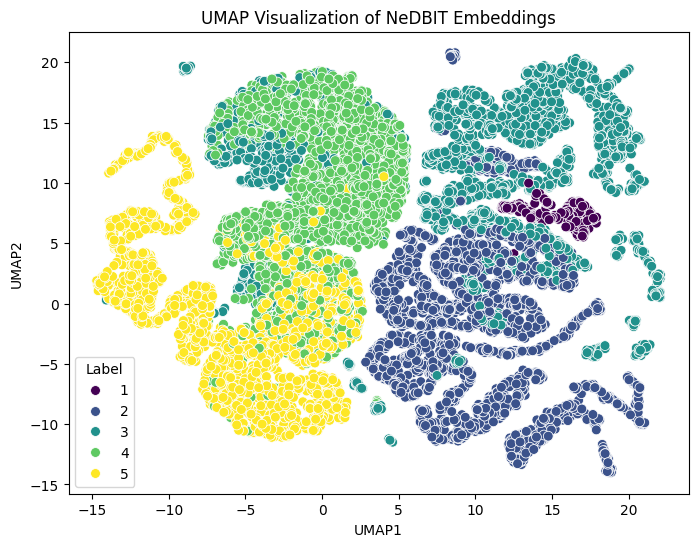

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=1.0)
#, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT Embeddings")
plt.savefig(base_path + "umap_NeDBIT_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [14]:
# combined_pos_neg_signals.csv
df_merged_signals = pd.read_csv("data/combined_pos_neg_signals_bc.csv", sep="\t", engine="c")
df_merged_signals

,cg15694422_MGLL,cg02116768_FOXK2,cg04582369_ITPR1,cg06490548_C9orf156,cg04498924_AFF1,cg13675051_RNF19A,cg22644321_TRIB1,cg18881723_SLAMF1,cg26048493_ACOT7,cg14173033_FOXK2,...,cg10650299_CPSF4,cg10579627_TATDN2,cg21850510_TET1,cg20757507_FAM107B,cg20174535_DLEU1,cg20174535_DLEU2,cg08740088_BICC1,cg06081221_EFHD1,cg02891314_GFPT2,cg16147221_SLC2A9
0,0.420649,0.460033,0.771424,0.802780,0.768757,0.626586,0.312701,0.216552,0.705703,0.442265,...,0.953156,0.932022,0.028040,0.970891,0.034707,0.034707,0.906942,0.983885,0.462490,0.023338
1,0.315654,0.534132,0.779049,0.718385,0.779800,0.650939,0.229696,0.208266,0.697380,0.429679,...,0.934967,0.897426,0.075745,0.970338,0.044283,0.044283,0.918749,0.915222,0.896144,0.054163
2,0.371301,0.461211,0.743536,0.670084,0.673845,0.606706,0.243923,0.202701,0.635349,0.445132,...,0.935602,0.799745,0.068495,0.963702,0.065518,0.065518,0.925188,0.903167,0.520799,0.015647
3,0.265431,0.472303,0.797906,0.855936,0.739114,0.548783,0.194979,0.214147,0.736043,0.374353,...,0.951361,0.936703,0.023862,0.971520,0.024162,0.024162,0.919452,0.919729,0.315581,0.043399
4,0.235579,0.392235,0.882842,0.889170,0.820634,0.446960,0.192450,0.135272,0.796830,0.328048,...,0.946068,0.933853,0.027892,0.979004,0.029777,0.029777,0.913045,0.970073,0.237545,0.014381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.560614,0.663921,0.580306,0.570885,0.553366,0.685908,0.440183,0.371205,0.517210,0.532878,...,0.954906,0.827033,0.044587,0.651138,0.032460,0.032460,0.774190,0.906381,0.919324,0.016608
76,0.483471,0.508202,0.708337,0.698488,0.660684,0.667258,0.340785,0.226932,0.608793,0.443098,...,0.965237,0.938610,0.054921,0.975159,0.046822,0.046822,0.852637,0.942668,0.468496,0.061690
77,0.521094,0.490106,0.765437,0.758394,0.752218,0.667705,0.258195,0.206108,0.672132,0.436601,...,0.955318,0.954929,0.047878,0.986032,0.021276,0.021276,0.952684,0.930286,0.728135,0.015104
78,0.464730,0.607031,0.750010,0.781058,0.729401,0.627836,0.289059,0.235276,0.708843,0.494046,...,0.959614,0.895962,0.029691,0.983798,0.020863,0.020863,0.881022,0.925610,0.435270,0.011815


In [15]:
#df_merged_signals_transposed = df_merged_signals.transpose()
#df_merged_signals_transposed

In [16]:
feature_names = df_labels["feature_name"].tolist()

In [17]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg15694422_MGLL,cg02116768_FOXK2,cg13675051_RNF19A,cg22644321_TRIB1,cg18881723_SLAMF1,cg14173033_FOXK2,cg26582754_PHACTR2,cg07109046_FOXO1,cg20758823_RUNX2,cg09324018_FAM49A,...,cg18984983_CYP2E1,cg14808795_FYB,cg17434453_SLC29A3,cg01343663_LINC01502,cg24067429_C1orf228,cg23018707_C12orf35,cg23930101_DENND6A,cg12047283_SGK1,cg04225510_CDC123,cg04225510_NUDT5
0,0.420649,0.460033,0.626586,0.312701,0.216552,0.442265,0.413432,0.504706,0.430651,0.491158,...,0.075026,0.113233,0.934598,0.979235,0.006847,0.956403,0.073070,0.040553,0.024945,0.024945
1,0.315654,0.534132,0.650939,0.229696,0.208266,0.429679,0.359373,0.418204,0.508906,0.609812,...,0.081008,0.038069,0.952298,0.985307,0.019339,0.949201,0.065043,0.044754,0.045394,0.045394
2,0.371301,0.461211,0.606706,0.243923,0.202701,0.445132,0.298765,0.419539,0.430397,0.545214,...,0.298682,0.041571,0.959437,0.982901,0.005382,0.907477,0.004337,0.001351,0.030284,0.030284
3,0.265431,0.472303,0.548783,0.194979,0.214147,0.374353,0.326456,0.322641,0.333302,0.395060,...,0.336387,0.064658,0.932989,0.983414,0.026038,0.974282,0.021510,0.030674,0.071662,0.071662
4,0.235579,0.392235,0.446960,0.192450,0.135272,0.328048,0.349825,0.427290,0.320553,0.373462,...,0.127636,0.040349,0.963456,0.974309,0.037275,0.947832,0.045128,0.009891,0.050370,0.050370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.560614,0.663921,0.685908,0.440183,0.371205,0.532878,0.496821,0.553911,0.597685,0.648615,...,0.105259,0.043573,0.935375,0.984228,0.010233,0.960627,0.028170,0.007394,0.063877,0.063877
76,0.483471,0.508202,0.667258,0.340785,0.226932,0.443098,0.488674,0.470104,0.404161,0.512464,...,0.065078,0.033958,0.928511,0.986848,0.002602,0.956324,0.028191,0.049421,0.063944,0.063944
77,0.521094,0.490106,0.667705,0.258195,0.206108,0.436601,0.407097,0.469890,0.400028,0.496558,...,0.053701,0.035533,0.979987,0.968630,0.002084,0.916125,0.032141,0.056186,0.013980,0.013980
78,0.464730,0.607031,0.627836,0.289059,0.235276,0.494046,0.511305,0.436539,0.422716,0.613656,...,0.416230,0.028477,0.971027,0.920839,0.035468,0.948923,0.020509,0.043922,0.045494,0.045494


In [18]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
cg15694422_MGLL,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
cg02116768_FOXK2,0.460033,0.534132,0.461211,0.472303,0.392235,0.532944,0.473742,0.487338,0.593069,0.520825,...,0.514610,0.535238,0.619850,0.615523,0.568770,0.663921,0.508202,0.490106,0.607031,0.537934
cg13675051_RNF19A,0.626586,0.650939,0.606706,0.548783,0.446960,0.616721,0.591641,0.544680,0.595463,0.620645,...,0.685341,0.733005,0.619955,0.627940,0.730569,0.685908,0.667258,0.667705,0.627836,0.626844
cg22644321_TRIB1,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
cg18881723_SLAMF1,0.216552,0.208266,0.202701,0.214147,0.135272,0.229202,0.148842,0.203557,0.277376,0.171203,...,0.259142,0.291454,0.294704,0.315083,0.198489,0.371205,0.226932,0.206108,0.235276,0.248134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23018707_C12orf35,0.956403,0.949201,0.907477,0.974282,0.947832,0.940372,0.975752,0.920052,0.948698,0.959086,...,0.947165,0.931376,0.942083,0.967812,0.961334,0.960627,0.956324,0.916125,0.948923,0.957488
cg23930101_DENND6A,0.073070,0.065043,0.004337,0.021510,0.045128,0.047776,0.009469,0.043679,0.011673,0.049269,...,0.064579,0.044973,0.036082,0.031618,0.027711,0.028170,0.028191,0.032141,0.020509,0.022426
cg12047283_SGK1,0.040553,0.044754,0.001351,0.030674,0.009891,0.016125,0.014785,0.008127,0.033388,0.014986,...,0.002619,0.012554,0.001959,0.021630,0.026853,0.007394,0.049421,0.056186,0.043922,0.033947
cg04225510_CDC123,0.024945,0.045394,0.030284,0.071662,0.050370,0.071477,0.035620,0.033986,0.024068,0.054563,...,0.036930,0.026448,0.055935,0.051273,0.131382,0.063877,0.063944,0.013980,0.045494,0.082493


In [19]:
dnam_signals_transpose.to_csv(base_path + "dnam_signals_transpose.csv")

In [20]:
dnam_signals_transpose = dnam_signals_transpose.reset_index(drop=True)
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,0.460033,0.534132,0.461211,0.472303,0.392235,0.532944,0.473742,0.487338,0.593069,0.520825,...,0.514610,0.535238,0.619850,0.615523,0.568770,0.663921,0.508202,0.490106,0.607031,0.537934
2,0.626586,0.650939,0.606706,0.548783,0.446960,0.616721,0.591641,0.544680,0.595463,0.620645,...,0.685341,0.733005,0.619955,0.627940,0.730569,0.685908,0.667258,0.667705,0.627836,0.626844
3,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
4,0.216552,0.208266,0.202701,0.214147,0.135272,0.229202,0.148842,0.203557,0.277376,0.171203,...,0.259142,0.291454,0.294704,0.315083,0.198489,0.371205,0.226932,0.206108,0.235276,0.248134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,0.956403,0.949201,0.907477,0.974282,0.947832,0.940372,0.975752,0.920052,0.948698,0.959086,...,0.947165,0.931376,0.942083,0.967812,0.961334,0.960627,0.956324,0.916125,0.948923,0.957488
10193,0.073070,0.065043,0.004337,0.021510,0.045128,0.047776,0.009469,0.043679,0.011673,0.049269,...,0.064579,0.044973,0.036082,0.031618,0.027711,0.028170,0.028191,0.032141,0.020509,0.022426
10194,0.040553,0.044754,0.001351,0.030674,0.009891,0.016125,0.014785,0.008127,0.033388,0.014986,...,0.002619,0.012554,0.001959,0.021630,0.026853,0.007394,0.049421,0.056186,0.043922,0.033947
10195,0.024945,0.045394,0.030284,0.071662,0.050370,0.071477,0.035620,0.033986,0.024068,0.054563,...,0.036930,0.026448,0.055935,0.051273,0.131382,0.063877,0.063944,0.013980,0.045494,0.082493


In [21]:
dnam_features = dnam_signals_transpose #.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,0.460033,0.534132,0.461211,0.472303,0.392235,0.532944,0.473742,0.487338,0.593069,0.520825,...,0.514610,0.535238,0.619850,0.615523,0.568770,0.663921,0.508202,0.490106,0.607031,0.537934
2,0.626586,0.650939,0.606706,0.548783,0.446960,0.616721,0.591641,0.544680,0.595463,0.620645,...,0.685341,0.733005,0.619955,0.627940,0.730569,0.685908,0.667258,0.667705,0.627836,0.626844
3,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
4,0.216552,0.208266,0.202701,0.214147,0.135272,0.229202,0.148842,0.203557,0.277376,0.171203,...,0.259142,0.291454,0.294704,0.315083,0.198489,0.371205,0.226932,0.206108,0.235276,0.248134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,0.956403,0.949201,0.907477,0.974282,0.947832,0.940372,0.975752,0.920052,0.948698,0.959086,...,0.947165,0.931376,0.942083,0.967812,0.961334,0.960627,0.956324,0.916125,0.948923,0.957488
10193,0.073070,0.065043,0.004337,0.021510,0.045128,0.047776,0.009469,0.043679,0.011673,0.049269,...,0.064579,0.044973,0.036082,0.031618,0.027711,0.028170,0.028191,0.032141,0.020509,0.022426
10194,0.040553,0.044754,0.001351,0.030674,0.009891,0.016125,0.014785,0.008127,0.033388,0.014986,...,0.002619,0.012554,0.001959,0.021630,0.026853,0.007394,0.049421,0.056186,0.043922,0.033947
10195,0.024945,0.045394,0.030284,0.071662,0.050370,0.071477,0.035620,0.033986,0.024068,0.054563,...,0.036930,0.026448,0.055935,0.051273,0.131382,0.063877,0.063944,0.013980,0.045494,0.082493


In [22]:
n_neighbors=20 #10 #5
min_dist=0.8 #0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

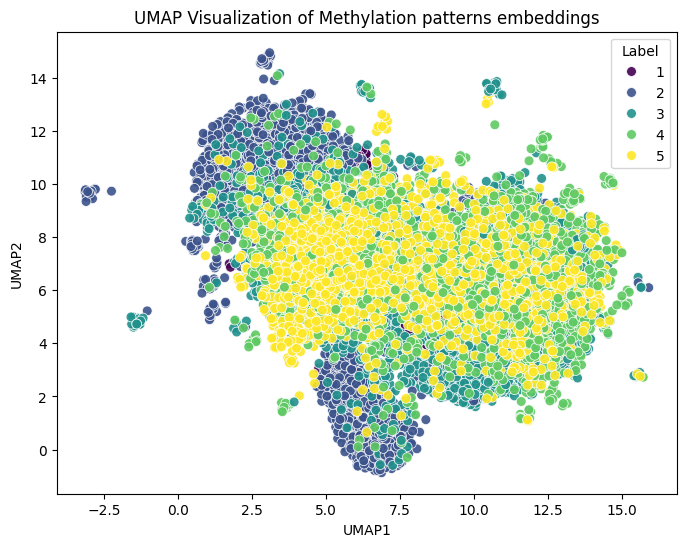

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig(base_path + "umap_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [24]:
#nebit_features = nebit_features.reset_index()
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.844475,1.673396,1.078528,0.198717
1,1,0.883759,1.726716,0.803134,0.079001
2,1,0.884858,1.634100,0.792330,0.094667
3,1,0.898153,1.691390,0.727866,0.044253
4,1,0.897157,1.671357,0.723161,0.044574
...,...,...,...,...,...
10192,3,2.998150,-0.058107,0.000006,0.000146
10193,3,2.998234,-0.023974,0.000005,0.000263
10194,3,2.996472,-0.062155,0.000009,0.000114
10195,3,2.998520,-0.018251,0.000007,0.000335


In [25]:
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.420649,0.315654,0.371301,0.265431,0.235579,0.429489,0.211561,0.344654,0.291120,0.246508,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,0.460033,0.534132,0.461211,0.472303,0.392235,0.532944,0.473742,0.487338,0.593069,0.520825,...,0.514610,0.535238,0.619850,0.615523,0.568770,0.663921,0.508202,0.490106,0.607031,0.537934
2,0.626586,0.650939,0.606706,0.548783,0.446960,0.616721,0.591641,0.544680,0.595463,0.620645,...,0.685341,0.733005,0.619955,0.627940,0.730569,0.685908,0.667258,0.667705,0.627836,0.626844
3,0.312701,0.229696,0.243923,0.194979,0.192450,0.275853,0.233757,0.233172,0.260231,0.176032,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
4,0.216552,0.208266,0.202701,0.214147,0.135272,0.229202,0.148842,0.203557,0.277376,0.171203,...,0.259142,0.291454,0.294704,0.315083,0.198489,0.371205,0.226932,0.206108,0.235276,0.248134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,0.956403,0.949201,0.907477,0.974282,0.947832,0.940372,0.975752,0.920052,0.948698,0.959086,...,0.947165,0.931376,0.942083,0.967812,0.961334,0.960627,0.956324,0.916125,0.948923,0.957488
10193,0.073070,0.065043,0.004337,0.021510,0.045128,0.047776,0.009469,0.043679,0.011673,0.049269,...,0.064579,0.044973,0.036082,0.031618,0.027711,0.028170,0.028191,0.032141,0.020509,0.022426
10194,0.040553,0.044754,0.001351,0.030674,0.009891,0.016125,0.014785,0.008127,0.033388,0.014986,...,0.002619,0.012554,0.001959,0.021630,0.026853,0.007394,0.049421,0.056186,0.043922,0.033947
10195,0.024945,0.045394,0.030284,0.071662,0.050370,0.071477,0.035620,0.033986,0.024068,0.054563,...,0.036930,0.026448,0.055935,0.051273,0.131382,0.063877,0.063944,0.013980,0.045494,0.082493


In [26]:
#nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features = pd.concat([nebit_features, dnam_features], axis=1)
nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,70,71,72,73,74,75,76,77,78,79
0,1,0.844475,1.673396,1.078528,0.198717,0.420649,0.315654,0.371301,0.265431,0.235579,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,1,0.883759,1.726716,0.803134,0.079001,0.460033,0.534132,0.461211,0.472303,0.392235,...,0.514610,0.535238,0.619850,0.615523,0.568770,0.663921,0.508202,0.490106,0.607031,0.537934
2,1,0.884858,1.634100,0.792330,0.094667,0.626586,0.650939,0.606706,0.548783,0.446960,...,0.685341,0.733005,0.619955,0.627940,0.730569,0.685908,0.667258,0.667705,0.627836,0.626844
3,1,0.898153,1.691390,0.727866,0.044253,0.312701,0.229696,0.243923,0.194979,0.192450,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
4,1,0.897157,1.671357,0.723161,0.044574,0.216552,0.208266,0.202701,0.214147,0.135272,...,0.259142,0.291454,0.294704,0.315083,0.198489,0.371205,0.226932,0.206108,0.235276,0.248134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,3,2.998150,-0.058107,0.000006,0.000146,0.956403,0.949201,0.907477,0.974282,0.947832,...,0.947165,0.931376,0.942083,0.967812,0.961334,0.960627,0.956324,0.916125,0.948923,0.957488
10193,3,2.998234,-0.023974,0.000005,0.000263,0.073070,0.065043,0.004337,0.021510,0.045128,...,0.064579,0.044973,0.036082,0.031618,0.027711,0.028170,0.028191,0.032141,0.020509,0.022426
10194,3,2.996472,-0.062155,0.000009,0.000114,0.040553,0.044754,0.001351,0.030674,0.009891,...,0.002619,0.012554,0.001959,0.021630,0.026853,0.007394,0.049421,0.056186,0.043922,0.033947
10195,3,2.998520,-0.018251,0.000007,0.000335,0.024945,0.045394,0.030284,0.071662,0.050370,...,0.036930,0.026448,0.055935,0.051273,0.131382,0.063877,0.063944,0.013980,0.045494,0.082493


In [27]:
n_neighbors=20 #10 #5
min_dist=0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

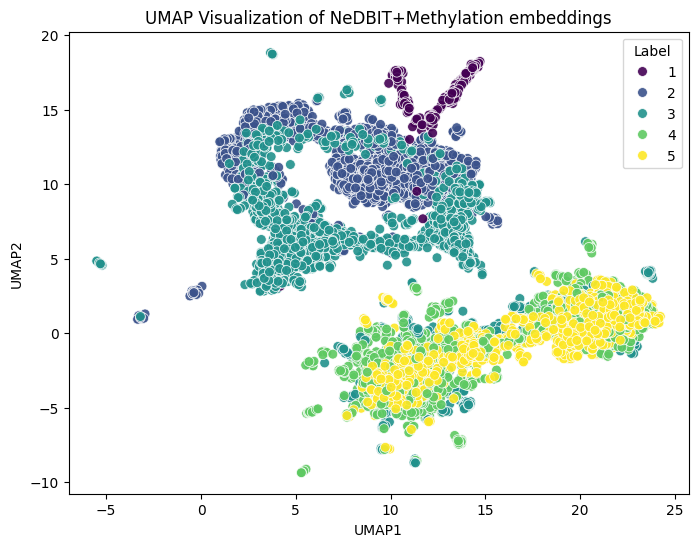

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data frame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation embeddings")
plt.savefig(base_path + "umap_NeDBIT_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [29]:
df_nebit_dnam_features = pd.concat([df_nebit_features.iloc[:, 2:], dnam_features], axis=1)
df_nebit_dnam_features

,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,70,71,72,73,74,75,76,77,78,79
0,460,1,0.844475,415.86290,1.078528,0.198717,0.420649,0.315654,0.371301,0.265431,...,0.488162,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450
1,761,1,0.883759,426.04770,0.803134,0.079001,0.460033,0.534132,0.461211,0.472303,...,0.514610,0.535238,0.619850,0.615523,0.568770,0.663921,0.508202,0.490106,0.607031,0.537934
2,690,1,0.884858,408.35680,0.792330,0.094667,0.626586,0.650939,0.606706,0.548783,...,0.685341,0.733005,0.619955,0.627940,0.730569,0.685908,0.667258,0.667705,0.627836,0.626844
3,1290,1,0.898153,419.29990,0.727866,0.044253,0.312701,0.229696,0.243923,0.194979,...,0.308620,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135
4,1054,1,0.897157,415.47340,0.723161,0.044574,0.216552,0.208266,0.202701,0.214147,...,0.259142,0.291454,0.294704,0.315083,0.198489,0.371205,0.226932,0.206108,0.235276,0.248134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,6,3,2.998150,85.12343,0.000006,0.000146,0.956403,0.949201,0.907477,0.974282,...,0.947165,0.931376,0.942083,0.967812,0.961334,0.960627,0.956324,0.916125,0.948923,0.957488
10193,6,3,2.998234,91.64322,0.000005,0.000263,0.073070,0.065043,0.004337,0.021510,...,0.064579,0.044973,0.036082,0.031618,0.027711,0.028170,0.028191,0.032141,0.020509,0.022426
10194,5,3,2.996472,84.35021,0.000009,0.000114,0.040553,0.044754,0.001351,0.030674,...,0.002619,0.012554,0.001959,0.021630,0.026853,0.007394,0.049421,0.056186,0.043922,0.033947
10195,10,3,2.998520,92.73646,0.000007,0.000335,0.024945,0.045394,0.030284,0.071662,...,0.036930,0.026448,0.055935,0.051273,0.131382,0.063877,0.063944,0.013980,0.045494,0.082493


In [30]:
df_nebit_dnam_features["labels"] = labels

In [31]:
file_path = "data/df_nebit_dnam_features.csv"
df_nebit_dnam_features.to_csv(file_path, sep="\t", header=None, index=None)
df_nebit_dnam_features

,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,...,71,72,73,74,75,76,77,78,79,labels
0,460,1,0.844475,415.86290,1.078528,0.198717,0.420649,0.315654,0.371301,0.265431,...,0.304428,0.370463,0.571908,0.439803,0.560614,0.483471,0.521094,0.464730,0.438450,1
1,761,1,0.883759,426.04770,0.803134,0.079001,0.460033,0.534132,0.461211,0.472303,...,0.535238,0.619850,0.615523,0.568770,0.663921,0.508202,0.490106,0.607031,0.537934,1
2,690,1,0.884858,408.35680,0.792330,0.094667,0.626586,0.650939,0.606706,0.548783,...,0.733005,0.619955,0.627940,0.730569,0.685908,0.667258,0.667705,0.627836,0.626844,1
3,1290,1,0.898153,419.29990,0.727866,0.044253,0.312701,0.229696,0.243923,0.194979,...,0.355249,0.366740,0.348679,0.294176,0.440183,0.340785,0.258195,0.289059,0.283135,1
4,1054,1,0.897157,415.47340,0.723161,0.044574,0.216552,0.208266,0.202701,0.214147,...,0.291454,0.294704,0.315083,0.198489,0.371205,0.226932,0.206108,0.235276,0.248134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,6,3,2.998150,85.12343,0.000006,0.000146,0.956403,0.949201,0.907477,0.974282,...,0.931376,0.942083,0.967812,0.961334,0.960627,0.956324,0.916125,0.948923,0.957488,5
10193,6,3,2.998234,91.64322,0.000005,0.000263,0.073070,0.065043,0.004337,0.021510,...,0.044973,0.036082,0.031618,0.027711,0.028170,0.028191,0.032141,0.020509,0.022426,5
10194,5,3,2.996472,84.35021,0.000009,0.000114,0.040553,0.044754,0.001351,0.030674,...,0.012554,0.001959,0.021630,0.026853,0.007394,0.049421,0.056186,0.043922,0.033947,5
10195,10,3,2.998520,92.73646,0.000007,0.000335,0.024945,0.045394,0.030284,0.071662,...,0.026448,0.055935,0.051273,0.131382,0.063877,0.063944,0.013980,0.045494,0.082493,5


In [32]:
#feature_gene_names = dnam_signals_transpose.iloc[0:, 0]
#feature_gene_names

In [33]:
#df_feature_names = pd.DataFrame(feature_gene_names)
#file_path = base_path + "df_feature_names.csv"
#df_feature_names.to_csv(file_path, sep="\t", index=None)
#df_feature_names

In [34]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import umap

base_path = "naipu_processed_data/only_positive_corr_data/"
base_plot_path = "plots/positive_negative_corr_data/"
embed_conv = torch.load(base_path + "embed_conv.pt")
embed_batch_norm = torch.load(base_path + "embed_batch_norm.pt")
true_labels = torch.load(base_path + "true_labels.pt")
true_labels = [int(item) + 1 for item in true_labels]

FileNotFoundError: [Errno 2] No such file or directory: 'naipu_processed_data/only_positive_corr_data/embed_conv.pt'

In [ ]:
n_neighbors=10 #10 #5
min_dist=0.99 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization of node embeddings (GNN)")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [ ]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

umap_conv_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_conv)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_conv_embed[:, 0], "UMAP2": umap_conv_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of node embeddings (GNN)")
plt.savefig(base_plot_path + "umap_conv_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [ ]:
#df_output_gene_rankings = pd.read_csv(base_path + "output_gene_ranking_only_positive_corr", sep="\t", header=None)
#df_output_gene_rankings = df_output_gene_rankings.sort_values(by=[0])
#df_output_gene_rankings.to_csv(base_path + "output_gene_ranking_only_positive_corr_sorted", index=None)
#df_output_gene_rankings

In [ ]:
'''probes = dict()
for i, row in df_output_gene_rankings.iterrows():
    r_values = row.values[0].split(" ")
    name = r_values[0]
    p_name = name.split("_")[0]
    if p_name not in probes:
        probes[p_name] = 1
    else:
        probes[p_name] += 1'''

In [ ]:
#dict(sorted(probes.items(), key=lambda item: item[1], reverse=True))

In [ ]:
import pandas as pd
import numpy as np

path = "naipu_processed_data/only_positive_corr_data/"
df_test_data = pd.read_csv(path + "df_nebit_dnam_features.csv", sep="\t", header=None)
df_test_data

In [ ]:
df_f_name_labels = df_test_data.loc[:, 39:]
df_f_name_labels

In [ ]:
df_seeds = pd.read_csv(path + "seed_features.tsv", sep="\t", header=None)
df_seeds